# Statistical analysis of Mutual Information calculations


### Prepare for the statistical analyses

##### Import the modules we're going to use

In [1]:
# File handling
import os
import json

# Calculations
import numpy as np
import scipy.stats as stats
import scikit_posthocs as ph

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Constants and useful values

In [2]:
freq_ranges = {"delta": (1, 3), "theta_low": (3, 5), "theta_high": (5, 7),
               "alpha": (7, 12), "beta": (12, 30), "gamma_low": (30, 50), "gamma_high": (50, 100)}
bands = list(freq_ranges.keys())
freq_limits = [1, 3, 5, 7, 12, 30, 50, 100]
channels = ['Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'HEOG+', 'HEOG', 'VEOG+', 'VEOG', 'M1']
phs_lims = np.linspace(-np.pi, np.pi, 5)

##### Load the data from the created `.json` file

In [11]:
file_path = "./results27sept2021_normd.json"
with open(file_path, "r") as jsonfile:
    data = json.load(jsonfile)

Let's check that the data has loaded correctly

In [12]:
print(f"""The data loaded is of type {type(data)}.
The third part of the data, which should be empty, has a length of {len(data[2])}""")

The data loaded is of type <class 'list'>.
The third part of the data, which should be empty, has a length of 0


Assign trials under different conditions to different variables. Free the space of the initial data matrix.

In [13]:
face = data[0]
scrambled = data[1]
del(data)
print(f"The face list has {len(face)} components: {face.keys()}")

The face list has 7 components: dict_keys(['delta', 'theta_low', 'theta_high', 'alpha', 'beta', 'gamma_low', 'gamma_high'])


### Statistical analyses
For the analyses we are going to first start with a Kruskal-Wallis (KW) test between the distributions for each band, for each channel between the two conditions.

##### KW test
The commented pha lines are the post-hoc Wilcoxon analysis (with Bonferroni p-adjusting)

In [51]:
H = np.empty([len(bands), len(channels)])
p = np.empty([len(bands), len(channels)])
pha = np.empty([len(bands), len(channels)])
for i, band in enumerate(bands):
    for j, channel in enumerate(channels):
        kw = stats.kruskal(face[band][channel], scrambled[band][channel])
        H[i,j], p[i,j] = kw
        #pha[i,j] = ph.posthoc_wilcoxon([face[band][channel][:2702], scrambled[band][channel]], p_adjust='bonferroni')[1][2]

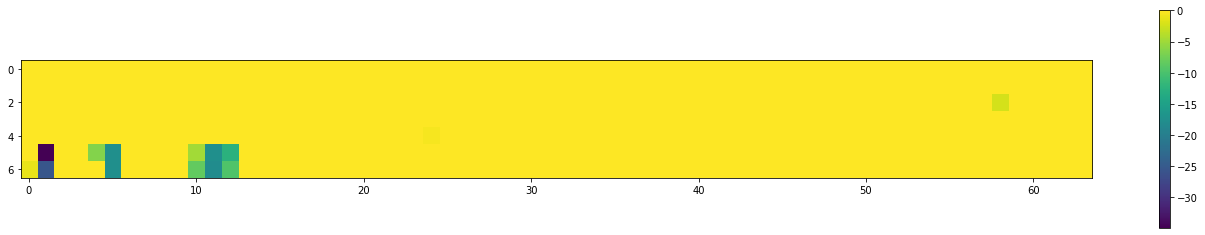

In [84]:
plt.figure(figsize=(24, 4))
plt.imshow(np.log(p))
plt.colorbar()

Make a simple Bonferroni p-adjust

In [56]:
p *= len(channels)*len(bands)
p[p>1] = 1

In [73]:
rows, cols = np.where(p < 0.01)

(array([5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6]),
 array([ 1,  4,  5, 10, 11, 12,  1,  5, 10, 11, 12]))

In [85]:
for row in set(rows):
    for col in set(cols):
        print(f"{bands[row]} band | Channel {channels[col]} | P-value of {p[row, col]:.2e}")

gamma_low band | Channel Fpz | P-value of 7.21e-16
gamma_low band | Channel AF3 | P-value of 1.54e-03
gamma_low band | Channel AF4 | P-value of 2.59e-08
gamma_low band | Channel F1 | P-value of 8.48e-03
gamma_low band | Channel Fz | P-value of 2.64e-08
gamma_low band | Channel F2 | P-value of 3.56e-06
gamma_high band | Channel Fpz | P-value of 8.46e-12
gamma_high band | Channel AF3 | P-value of 1.00e+00
gamma_high band | Channel AF4 | P-value of 2.43e-08
gamma_high band | Channel F1 | P-value of 2.34e-04
gamma_high band | Channel Fz | P-value of 1.75e-08
gamma_high band | Channel F2 | P-value of 6.70e-05


As one can see the results are the same/similar to the ones we obtained when doing the first analysis. Note that the channel AF3 is non-significant for the gamme high band. Also, regarding how we split the gamma band in two different regimes: we gotta address that!!!!